# Analysis of runs where the interace height changes

In [12]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import scipy.integrate as itr

data_dir = '../interface_height_down/run'
diag1_file = 'diag1.glob.nc'
grid_file = 'grid.glob.nc'

grid = xr.open_dataset(os.path.join(data_dir, grid_file))
dat_down = xr.open_dataset(os.path.join(data_dir, diag1_file))

data_dir = '../no_tide/run1'
dat_nc = xr.open_dataset(os.path.join(data_dir, diag1_file))

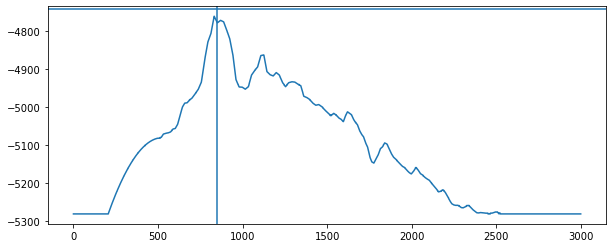

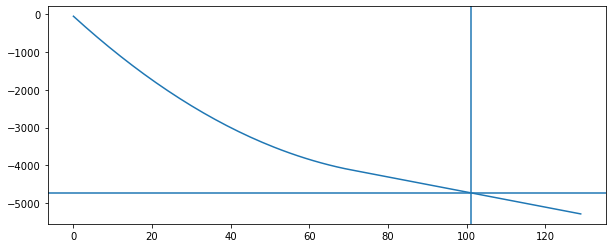

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(-grid.Depth)
ax.axvline(850)
ax.axhline(-4740)

fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.plot(grid.Z)
ax.axhline(-4740)
ax.axvline(101)

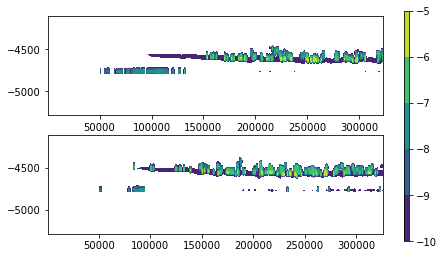

In [21]:
iy = 850
zslice = slice(70, 130)
tslice = slice(0, len(dat_down.T))
fig, axs = plt.subplots(2, 1)
axs[0].contourf(dat_down.T[tslice], grid.Z[zslice], np.log10(dat_down.KLeps[tslice, zslice, iy, 0].T), np.arange(-10, -4))
C = axs[1].contourf(dat_nc.T[tslice], grid.Z[zslice], np.log10(dat_nc.KLeps[tslice, zslice, iy, 0].T), np.arange(-10, -4))
plt.colorbar(C, cax=fig.add_axes((0.95, 0.1, 0.01, 0.8)), orientation='vertical')

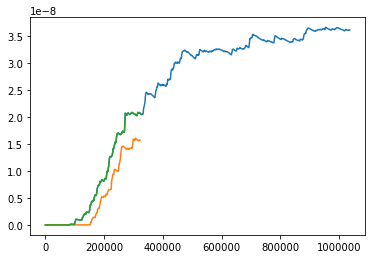

In [35]:
iy = 850
zslice = slice(70, 101)
tslice = slice(0, len(dat_down.T))
fig, ax = plt.subplots(1, 1)
ax.plot(dat_nc.T, itr.cumtrapz(dat_nc.KLeps[:, zslice, iy, 0].mean(axis=1), dat_nc.T, initial=0)/dat_nc.T)
ax.plot(dat_down.T[tslice], itr.cumtrapz(dat_down.KLeps[tslice, zslice, iy, 0].mean(axis=1), dat_down.T[tslice], initial=0)/dat_down.T[tslice])
ax.plot(dat_nc.T[tslice], itr.cumtrapz(dat_nc.KLeps[tslice, zslice, iy, 0].mean(axis=1), dat_nc.T[tslice], initial=0)/dat_nc.T[tslice])

In [31]:
eps_down = dat_down.KLeps.mean(axis=(1, 2, 3))
eps_nc = dat_nc.KLeps.mean(axis=(1, 2, 3))

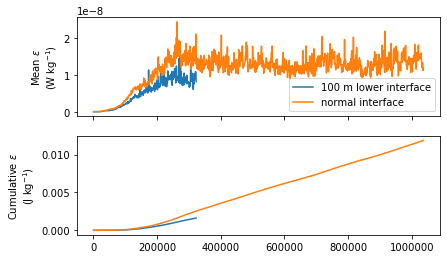

In [32]:
fig, axs = plt.subplots(2, 1, figsize=(6.5, 4), sharex=True)

# axs[0].plot(diag1['T'], 2*np.sin(2*np.pi*diag1['T']/44640))
axs[0].plot(dat_down['T'], eps_down, label='100 m lower interface')
axs[0].plot(dat_nc['T'], eps_nc, label='normal interface')
axs[1].plot(dat_down['T'], itr.cumtrapz(eps_down, dat_down['T'], initial=0))
axs[1].plot(dat_nc['T'], itr.cumtrapz(eps_nc, dat_nc['T'], initial=0))
axs[0].legend()

axs[0].set_ylabel('Mean $\epsilon$\n(W kg$^{-1}$)')
axs[1].set_ylabel('Cumulative $\epsilon$\n(J kg$^{-1}$)')

name = 'down_normal_comparison.png'
# fig.savefig(os.path.join(save_dir, name), bbox_inches='tight', pad_inches=0.,
#             dpi=200)